# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
import random

# Generate a list of 10 random numbers between 1 and 100
random_numbers = [random.randint(1, 100) for _ in range(10)]

# Save the list to a text file named "simple_data.txt"
with open("simple_data.txt", "w") as file:
    for number in random_numbers:
        file.write(str(number) + "\n")


2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [3]:
import random

# Generate a random 5x5 matrix
random_matrix = [[random.randint(1, 100) for _ in range(5)] for _ in range(5)]

# Save the matrix to a text file named "data.txt"
with open("data.txt", "w") as file:
    for row in random_matrix:
        file.write("\t".join(map(str, row)) + "\n")


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [4]:
import csv

# Load the data from the text file
with open("data.txt", "r") as file:
    # Read each line and split values by tab ("\t") to get the matrix
    matrix_data = [list(map(int, line.strip().split("\t"))) for line in file]

# Write the data to a CSV file named "data.csv"
with open("data.csv", "w", newline="") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(matrix_data)


4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [5]:
# Function to extract 6-bit characters from a byte
def extract_chars(byte):
    # Extract 6-bit characters from the byte
    return [(byte >> i) & 0b111111 for i in range(0, 48, 6)]

# Function to convert 6-bit characters to ASCII
def convert_to_ascii(chars):
    # Convert each 6-bit character to ASCII
    return ''.join([chr(char) for char in chars])

# Read the binary file "credit_card.dat" and convert the data
with open("credit_card.dat", "rb") as file:
    # Read each byte from the file
    byte = file.read(1)
    while byte:
        # Extract 6-bit characters from the byte
        chars = extract_chars(ord(byte))
        
        # Convert 6-bit characters to ASCII and print the credit card number
        credit_card_number = convert_to_ascii(chars)
        print(credit_card_number, end='')
        
        # Read the next byte
        byte = file.read(1)


FileNotFoundError: [Errno 2] No such file or directory: 'credit_card.dat'

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [6]:
import json
import csv

# Load the JSON data from the file
with open("user_data.json", "r") as json_file:
    data = json.load(json_file)

# Filter the data by the "CreditCardType" field equals to "American Express"
filtered_data = [user for user in data if user.get("CreditCardType") == "American Express"]

# Define the CSV file name
csv_file_name = "american_express_data.csv"

# Save the filtered data to a CSV file
with open(csv_file_name, "w", newline="") as csv_file:
    fieldnames = data[0].keys()  # Assuming all users have the same keys
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write the header
    csv_writer.writeheader()

    # Write the filtered data
    csv_writer.writerows(filtered_data)

print(f"Filtered data has been saved to {csv_file_name}.")


Filtered data has been saved to american_express_data.csv.


6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    812

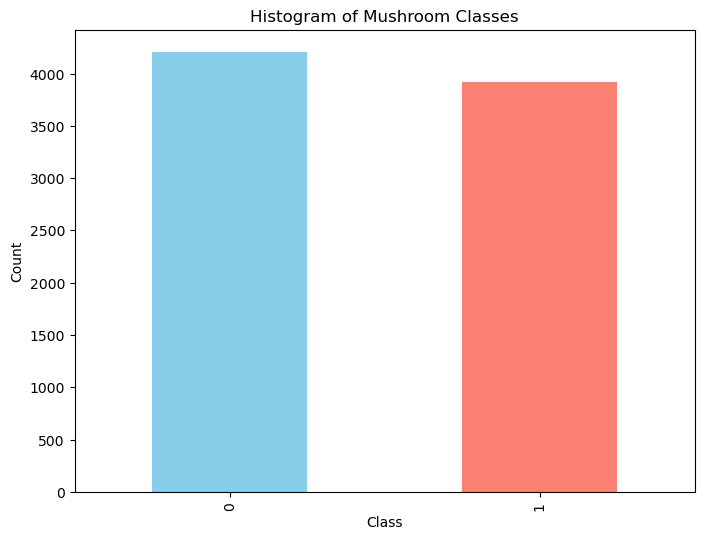

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the URL
url = "https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1"
data = pd.read_csv(url)

# Explore the data
print("Data Info:")
print(data.info())

# Draw the histogram of the 'class' field
plt.figure(figsize=(8, 6))
data['class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Histogram of Mushroom Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

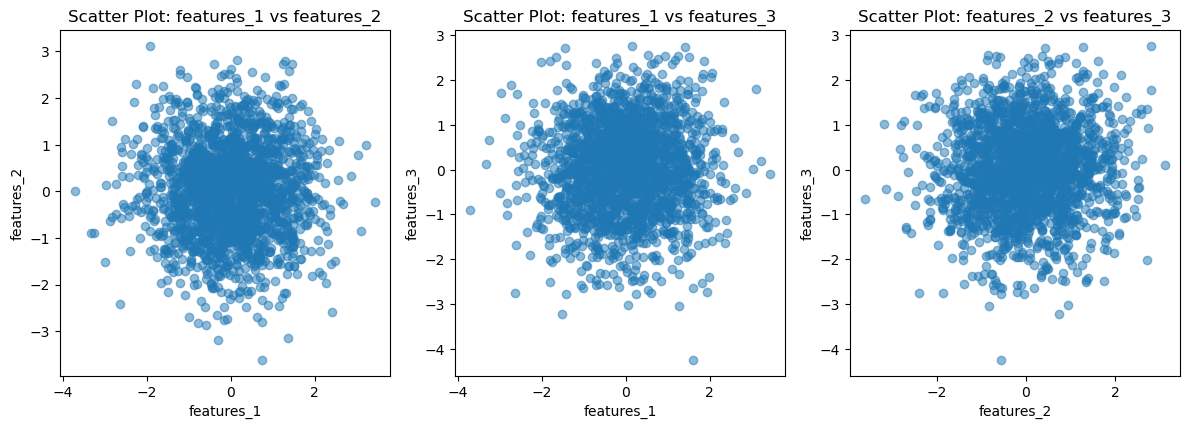

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Load the data from the remote file
url = "https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1"
data = pd.read_csv(url)

# Select the fields for scatter plots
selected_fields = ['features_1', 'features_2', 'features_3']

# Create scatter plots for all possible combinations of selected fields
combinations_list = list(combinations(selected_fields, 2))

plt.figure(figsize=(12, 8))

for i, combination in enumerate(combinations_list, 1):
    field1, field2 = combination
    plt.subplot(2, 3, i)
    plt.scatter(data[field1], data[field2], alpha=0.5)
    plt.title(f"Scatter Plot: {field1} vs {field2}")
    plt.xlabel(field1)
    plt.ylabel(field2)

plt.tight_layout()
plt.show()


8\. Load the same file of point 6, and convert the file to json with Pandas.

In [9]:
import pandas as pd

# Load the data from the URL
url = "https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1"
data = pd.read_csv(url)

# Convert the DataFrame to JSON and save it to a file
json_file_name = "mushrooms_data.json"
data.to_json(json_file_name, orient='records', lines=True)

print(f"Data has been saved to {json_file_name}.")


Data has been saved to mushrooms_data.json.
